Refrence : https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/

MTCNN(Multi-Task Cascaded Convolutional Neural Networks) , YOLO(You look only once) ,

**-> To find face encapsulating box**

Keras-vggface ->  find face embeddings

# **Installing and Importing Dependencies**

In [ ]:
!sudo pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-odo1ffbm
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-odo1ffbm
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done


In [ ]:
!pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: h5py, keras, numpy, pillow, pyyaml, scipy, six
Required-by: 


In [ ]:
!sudo pip install mtcnn

In [ ]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [ ]:
import mtcnn

# **Load image from file**

**Using Matplotlib**

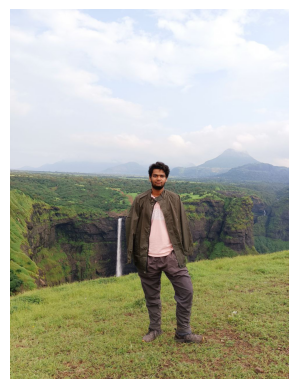

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Load the image
image = plt.imread('/aniket1.jpg')

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

**Using CV2**

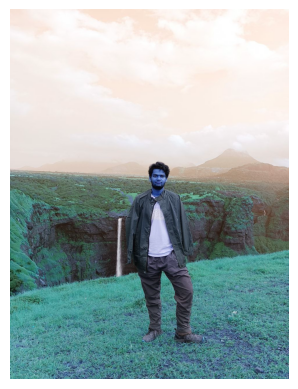

In [ ]:
import cv2
# Load the image
image = cv2.imread('/aniket1.jpg')                              #"imread" converts the image into array
# Convert the image to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

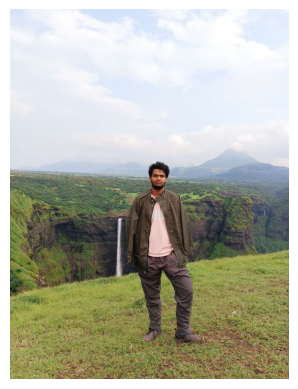

In [ ]:
plt.imshow(image_rgb)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

# **Geting Face box using MTCNN and Face embeddings using VGG Keras**

In [ ]:
from mtcnn.mtcnn import MTCNN
from PIL import Image
import numpy as np
from numpy import asarray

In [ ]:
# create the detector(object using MTCNN class), using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(image_rgb)

1/1 [==============================] - 0s 117ms/step


In [ ]:
results

[{'box': [489, 555, 47, 60],
  'confidence': 0.9999999403953552,
  'keypoints': {'left_eye': (502, 578),
   'right_eye': (526, 579),
   'nose': (514, 590),
   'mouth_left': (502, 599),
   'mouth_right': (524, 601)}},
 {'box': [595, 1073, 26, 30],
  'confidence': 0.7501306533813477,
  'keypoints': {'left_eye': (605, 1085),
   'right_eye': (615, 1084),
   'nose': (612, 1093),
   'mouth_left': (607, 1097),
   'mouth_right': (615, 1096)}}]

In [ ]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height

In [ ]:
face = image_rgb[y1:y2, x1:x2]

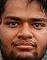

In [ ]:
image = Image.fromarray(face)
image

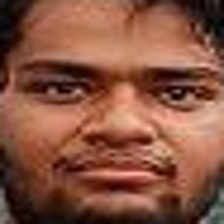

In [ ]:
image = image.resize((224, 224))
image

In [ ]:
face_array = np.asarray(image)
face_array.shape

(224, 224, 3)

# **The Complete Face Extraction Function**

1/1 [==============================] - 0s 118ms/step


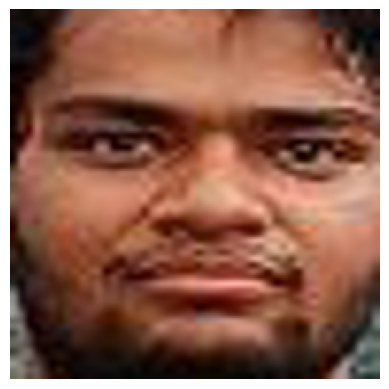

In [ ]:
# example of face detection with mtcnn
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
 # load image from file
 pixels = pyplot.imread(filename)
 # create the detector, using default weights
 detector = MTCNN()
 # detect faces in the image
 results = detector.detect_faces(pixels)
 # extract the bounding box from the first face
 x1, y1, width, height = results[0]['box']
 x2, y2 = x1 + width, y1 + height
 # extract the face
 face = pixels[y1:y2, x1:x2]
 # resize pixels to the model size
 image = Image.fromarray(face)
 image = image.resize(required_size)
 face_array = asarray(image)
 return face_array

# load the photo and extract the face
pixels = extract_face('/aniket1.jpg')
# plot the extracted face
plt.axis('off')
plt.imshow(pixels)
# show the plot
plt.show()



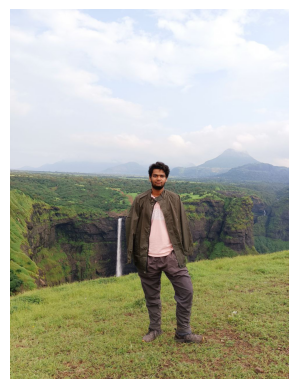

In [ ]:
from matplotlib import pyplot as plt
image = Image.open('/aniket1.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

# **Converting a face into face vector With VGGFace2**

In [ ]:
!pip install keras_applications


In [ ]:
# example of creating a face embedding
from keras_vggface.vggface import VGGFace
# create a vggface2 model

In [ ]:
#Creating a model
model = VGGFace(model='resnet50')
# summarize input and output shape
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)

Inputs: [<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_7')>]
Outputs: [<KerasTensor: shape=(None, 8631) dtype=float32 (created by layer 'classifier')>]


**Example of face detection with a vggface2 model**

The following code will predict which celebrity u look like

In [ ]:




from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

# extract a single face from a given photograph                       #Same function
def extract_face(filename, required_size=(224, 224)):
 # load image from file
 pixels = pyplot.imread(filename)
 # create the detector, using default weights
 detector = MTCNN()
 # detect faces in the image
 results = detector.detect_faces(pixels)
 # extract the bounding box from the first face
 x1, y1, width, height = results[0]['box']
 x2, y2 = x1 + width, y1 + height
 # extract the face
 face = pixels[y1:y2, x1:x2]
 # resize pixels to the model size
 image = Image.fromarray(face)
 image = image.resize(required_size)
 face_array = asarray(image)
 return face_array

# load the photo and extract the face
pixels = extract_face('/aniket1.jpg')
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)                                 #converting it into same format used while training model
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')

# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
 print('%s: %.3f%%' % (result[0], result[1]*100))

1/1 [==============================] - 1s 707ms/step
b' Shanthanu_Bhagyaraj': 64.950%
b' Nandamuri_Kalyan_Ram': 3.853%
b' Silambarasan': 2.048%
b' Mushfiqur_Rahim': 2.012%
b' Puri_Jagannadh': 1.829%


 We are intrested in yhat i.e the face embeding vector of the face,
to put in siemese network

In [ ]:
yhat.shape

(1, 8631)

Running the example loads the photograph, extracts the single face that we know was present, and then predicts the identity for the face.

The top five highest probability names are then displayed.

# **How to Perform Face Verification With VGGFace2 and cosine similarity**

In [ ]:
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [ ]:
# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
 # extract faces
 faces = [extract_face(f) for f in filenames]
 # convert into an array of samples
 samples = asarray(faces, 'float32')
 # prepare the face for the model, e.g. center pixels
 samples = preprocess_input(samples, version=2)
 # create a vggface model
 model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
 # perform prediction
 yhat = model.predict(samples)
 return yhat

In [ ]:
# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
 # calculate distance between embeddings
 score = cosine(known_embedding, candidate_embedding)
 if score <= thresh:
     print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
 else:
     print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

In [ ]:
# face verification with the VGGFace2 model
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

# extract a single face from a given photograph

def extract_face(filename, required_size=(224, 224)):
 # load image from file
 pixels = pyplot.imread(filename)
 # create the detector, using default weights
 detector = MTCNN()
 # detect faces in the image
 results = detector.detect_faces(pixels)
 # extract the bounding box from the first face
 x1, y1, width, height = results[0]['box']
 x2, y2 = x1 + width, y1 + height
 # extract the face
 face = pixels[y1:y2, x1:x2]
 # resize pixels to the model size
 image = Image.fromarray(face)
 image = image.resize(required_size)
 face_array = asarray(image)
 return face_array

# extract faces and calculate face embeddings for a list of photo files

def get_embeddings(filenames):
 # extract faces
 faces = [extract_face(f) for f in filenames]
 # convert into an array of samples
 samples = asarray(faces, 'float32')
 # prepare the face for the model, e.g. center pixels
 samples = preprocess_input(samples, version=2)
 # create a vggface model
 model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
 # perform prediction
 yhat = model.predict(samples)
 return yhat

# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
 # calculate distance between embeddings
 score = cosine(known_embedding, candidate_embedding)
 if score <= thresh:
     print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
 else:
     print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

# define filenames
filenames = ['/hrithik1.jpg', '/monkey1.jpg']
# get embeddings file filenames
embeddings = get_embeddings(filenames)


#Comparing
is_match(embeddings[0], embeddings[1])


1/1 [==============================] - 0s 133ms/step


1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 1s 1s/step
>face is NOT a Match (0.846 > 0.500)
